In [265]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss

In [268]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\ChunChunMaru\\Documents\\OCEAN\\doug\\utils.py'>

In [80]:
df = pd.read_csv("DougScore_editted.csv")

In [22]:
df.head()

,model_year,brand,model,Styling,Acceleration,Handling,Fun Factor,Cool Factor,WEEKEND_TOTAL,Features,Comfort,Quality,Practicality,Value,DAILY_TOTAL,DOUGSCORE,Video Link,Filming Location,Filming State,Vehicle Country
0,2020,McLaren,Speedtail,8,10,10,10,10,48,7,4,7,2,6,26,74,38:57:00,Columbus,Ohio,UK
1,1994,McLaren,F1,8,9,10,10,10,47,2,3,9,3,10,27,74,39:50:00,Burbank,California,UK
2,2022,Lucid,Air Dream Edition,7,10,6,7,8,38,9,8,7,5,6,35,73,39:40:00,Los Angeles,California,USA
3,2022,GMC,Hummer EV Pickup,5,9,4,9,7,34,9,7,7,9,7,39,73,33:42:00,Detroit,Michigan,USA
4,2021,Rivian,R1T,7,9,5,9,7,37,7,6,6,9,8,36,73,44:48:00,San Diego,California,USA


In [23]:
df.columns

Index(['model_year', 'brand', 'model', 'Styling', 'Acceleration', 'Handling',
       'Fun Factor', 'Cool Factor', 'WEEKEND_TOTAL', 'Features', 'Comfort',
       'Quality', 'Practicality', 'Value', 'DAILY_TOTAL', 'DOUGSCORE',
       'Video Link', 'Filming Location', 'Filming State', 'Vehicle Country'],
      dtype='object')

In [24]:
weekend_cols = [
    "Styling Acceleration","Handling","Fun Factor","Cool Factor"
]
daily_cols = [
    "Features","Comfort","Quality","Practicality","Value"
]

In [81]:
# create brand model index
df['brand_model_year']=df.apply(lambda x: f"{x['brand']}_{x['model']}_{x['model_year']}",axis=1)

In [82]:
df.brand_model_year.value_counts()

brand_model_year
McLaren_Speedtail_2020                  1
Dodge_Viper GTS_1997                    1
Bentley_Azure_2007                      1
Ford_Fiesta ST_2017                     1
Mercedes - Benz_CLA 250_2020            1
                                       ..
Lamborghini_Murcielago Roadster_2006    1
Range Rover_Velar R-Dynamic_2018        1
Mercedes-Benz_CLS450_2019               1
Volkswagen_Golf R_2018                  1
BMW_Isetta_1969                         1
Name: count, Length: 585, dtype: int64

In [83]:
df.set_index("brand_model_year",inplace=True)

## Correlation analysis



A) Fun factor, practicality, value
B) Acceleration, handling, comfort
C) Styling, cool factor, quality
D) Weekend score, daily score, brand
E) Weekend score, daily score, model year

In [142]:
def visualise_value_counts(df):
    for col in df.columns:
        sns.countplot(x=col, data=df)
        plt.show()
        # print(df_b[col].value_counts())
def print_heatmap(corr_df):
    sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,
               annot = True)
    plt.show()
def analyze_correlation(df):
    for method in ['pearson','spearman','kendall']:
        corr_df = df.corr(method='pearson', min_periods=1, numeric_only=False)
        print(method)
        print_heatmap(corr_df)
def get_top_5_overall(df):
    #assumes columns are rank-based
    final_rank = df.apply(lambda x: sum(x), axis=1)
    print("Top 5")
    print(final_rank.nlargest(n=5))
    

In [84]:
#A 
df_a = df[["Fun Factor", "Practicality", "Value"]]

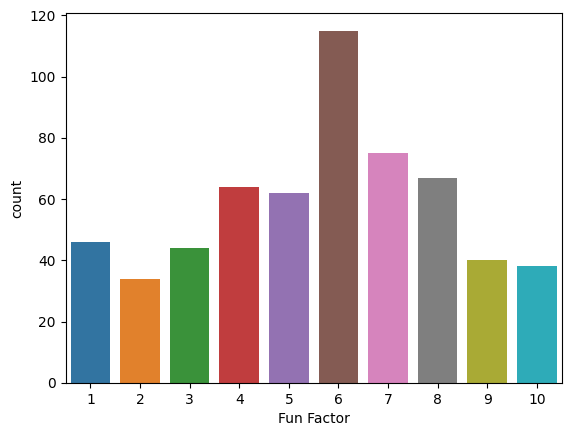

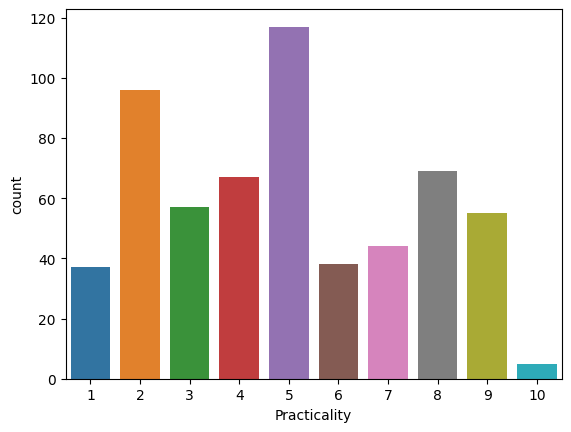

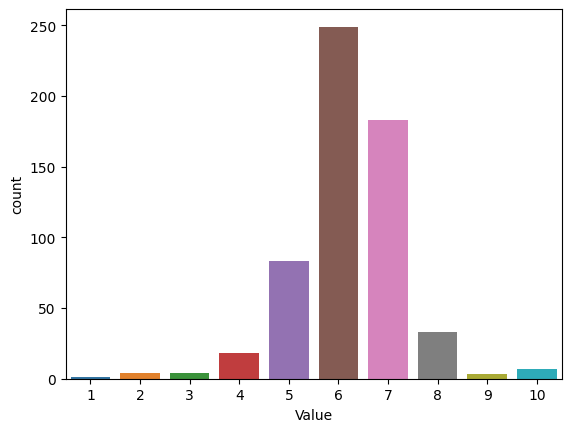

In [85]:
# These look like ordinal values, hence kendall can apply directly
# Distribution looks normal as well
visualise_value_counts(df_a)

pearson


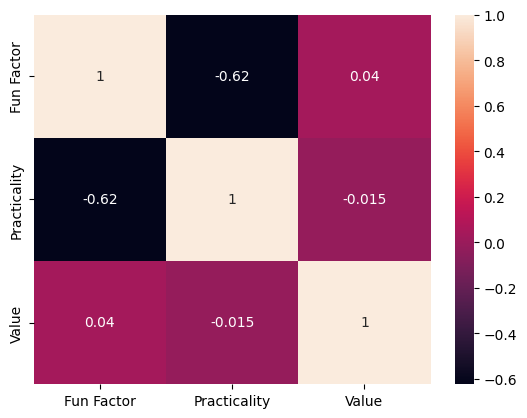

spearman


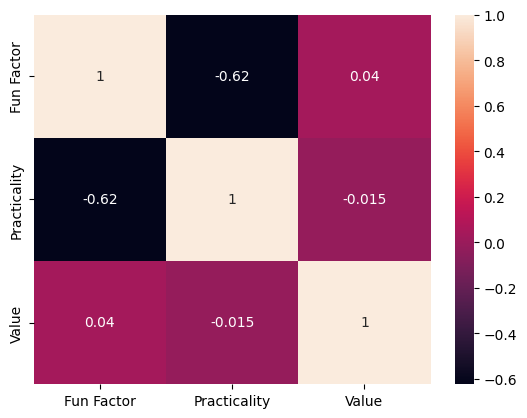

kendall


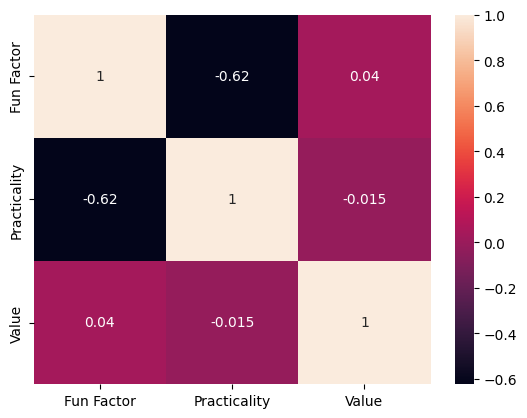

In [47]:
analyze_correlation(df_a)

In [86]:
get_top_5_overall(df_a)

Top 5
brand_model_year
Rivian_R1T_2021               26
GMC_Hummer EV Pickup_2022     25
Dodge_Ram TRX_2021            24
Ford_Raptor_2013              24
Jeep_Gladiator Mojave_2020    24
Name: final_rank, dtype: int64


C:\Users\ChunChunMaru\AppData\Local\Temp\ipykernel_10176\4039342172.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_rank'] = df.apply(lambda x: sum(x), axis=1)


### B) Acceleration, handling, comfort

In [88]:
df_b = df[["Acceleration", "Handling", "Comfort"]]

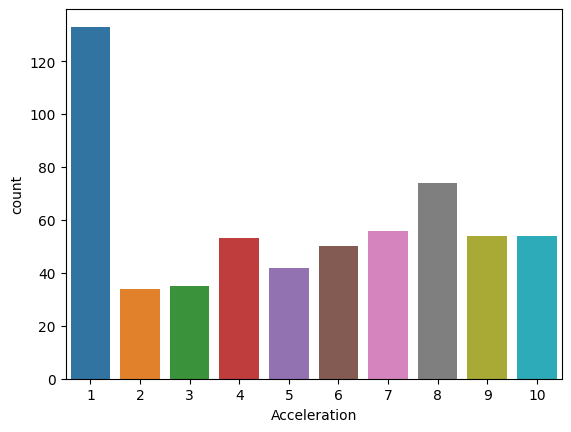

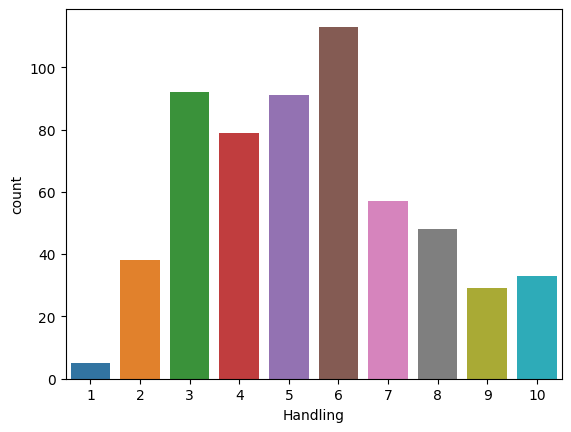

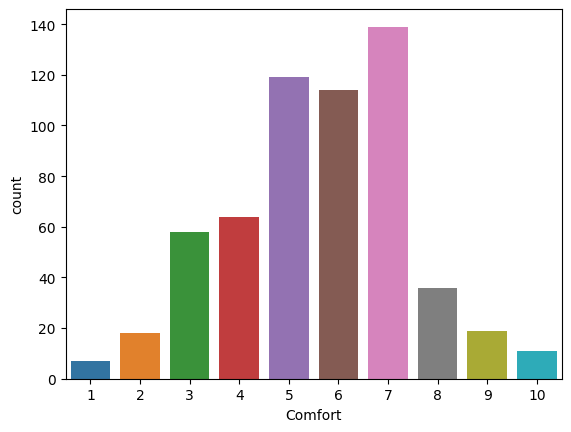

In [89]:
visualise_value_counts(df_b)

pearson


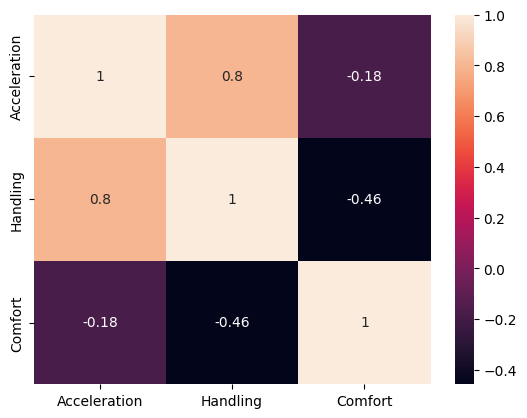

spearman


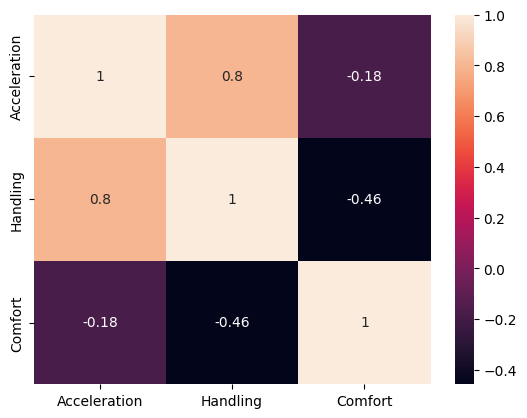

kendall


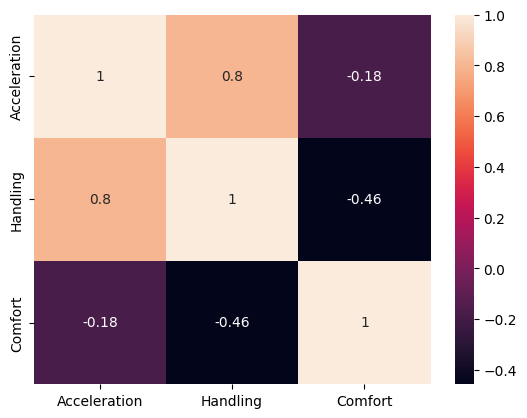

In [90]:
analyze_correlation(df_b)

In [91]:
get_top_5_overall(df_b)

Top 5
brand_model_year
McLaren_Speedtail_2020           24
Lucid_Air Dream Edition_2022     24
Bugatti_Divo_2019                24
Bugatti_Chiron Pur Sport_2021    24
Bugatti_Chiron_2018              24
Name: final_rank, dtype: int64


C:\Users\ChunChunMaru\AppData\Local\Temp\ipykernel_10176\4039342172.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_rank'] = df.apply(lambda x: sum(x), axis=1)


### C) Styling, cool factor, quality

In [93]:
df_c = df[["Styling", "Cool Factor", "Quality"]]

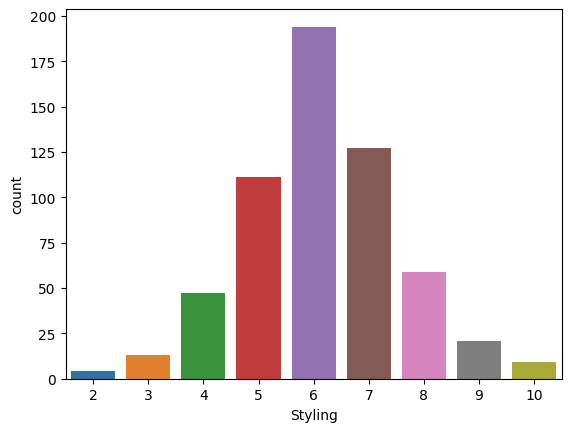

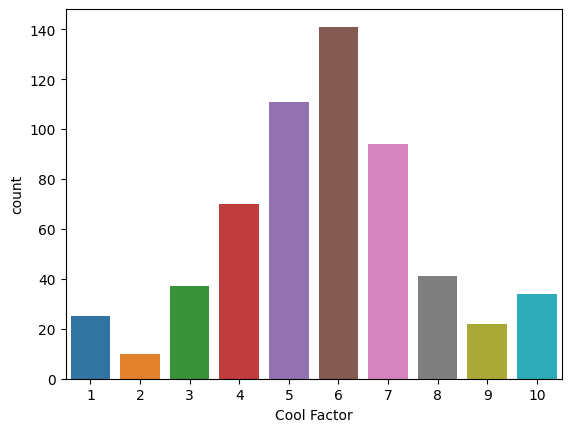

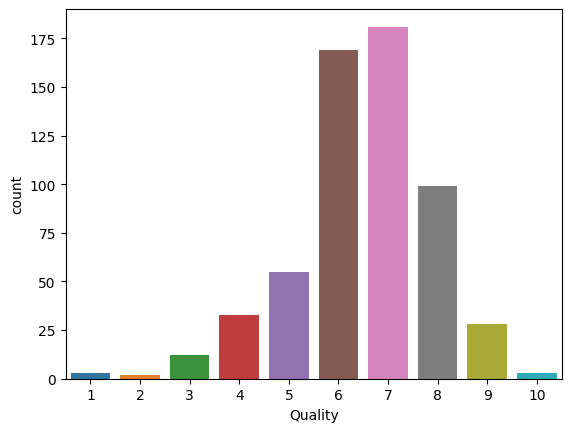

In [94]:
visualise_value_counts(df_c)

pearson


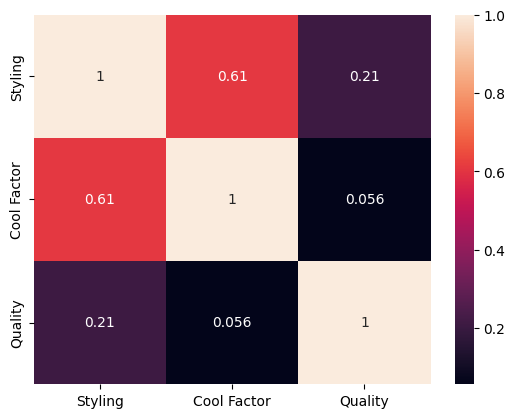

spearman


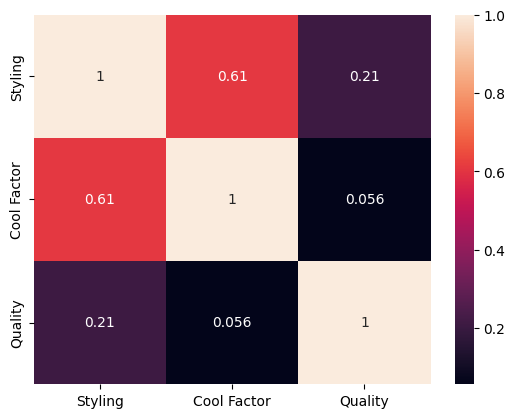

kendall


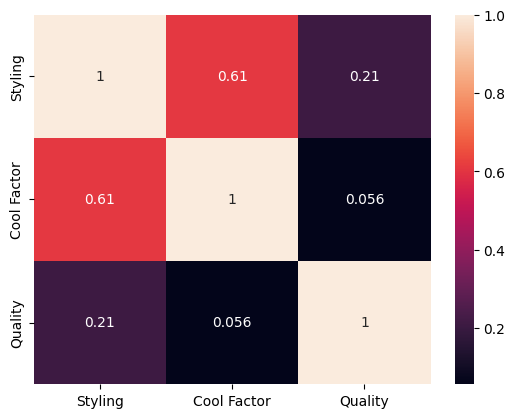

In [95]:
analyze_correlation(df_c)

In [96]:
get_top_5_overall(df_c)

Top 5
brand_model_year
Porsche_Carrera GT_2005              28
McLaren_F1_1994                      27
Ferrari_Monza SP1_2020               27
Ferrari_250 GT Lusso_1963            27
Mercedes-Benz_300SL Gullwing_1954    27
Name: final_rank, dtype: int64


C:\Users\ChunChunMaru\AppData\Local\Temp\ipykernel_10176\4039342172.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_rank'] = df.apply(lambda x: sum(x), axis=1)


In [191]:
df_c = df[(df['model_year'] > 1990) & (df['Practicality'] > 4)] [["Styling", "Cool Factor", "Quality"]]

In [192]:
get_top_5_overall(df_c)

Top 5
brand_model_year
Aston Martin_Lagonda Taraf_2018    26
Mercedes-Benz_G63 AMG 6x6_2015     24
Porsche_Taycan Turbo S_2020        23
Rolls-Royce_Phantom_2018           23
Lucid_Air Dream Edition_2022       22
dtype: int64


In [195]:
df_c = df[(df['model_year'] > 1990) & (df['Value'] > 6)] [["Styling", "Cool Factor", "Quality"]]

In [196]:
get_top_5_overall(df_c)

Top 5
brand_model_year
Porsche_Carrera GT_2005    28
McLaren_F1_1994            27
Ferrari_Monza SP1_2020     27
Bugatti_Divo_2019          25
McLaren_Senna_2019         25
dtype: int64


### D) Weekend score, daily score, brand

In [213]:
df_d = df[["WEEKEND_TOTAL", "DAILY_TOTAL", "brand"]]

In [214]:
# Top 5 across just their wekeend and daily totals

df_d['total_score'] = df_d[["WEEKEND_TOTAL", "DAILY_TOTAL"]].apply(lambda x: x.sum(), axis=1)
top5_vals = sorted(df_d['total_score'].unique(), reverse=True)[:5]
df_d[df_d['total_score'].isin(top5_vals)]
# get_top_5_overall(df[["WEEKEND_TOTAL", "DAILY_TOTAL"]])

C:\Users\ChunChunMaru\AppData\Local\Temp\ipykernel_10176\2365602598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['total_score'] = df_d[["WEEKEND_TOTAL", "DAILY_TOTAL"]].apply(lambda x: x.sum(), axis=1)


,WEEKEND_TOTAL,DAILY_TOTAL,brand,total_score
brand_model_year,,,,
McLaren_Speedtail_2020,48,26,McLaren,74
McLaren_F1_1994,47,27,McLaren,74
Lucid_Air Dream Edition_2022,38,35,Lucid,73
GMC_Hummer EV Pickup_2022,34,39,GMC,73
Rivian_R1T_2021,37,36,Rivian,73
Tesla_Model S Plaid_2021,37,36,Tesla,73
Bugatti_Divo_2019,47,26,Bugatti,73
Bugatti_Chiron Pur Sport_2021,48,25,Bugatti,73
Bugatti_Chiron_2018,48,25,Bugatti,73


In [156]:
# Get mean daily and weekend score for each brand 
df_mean = df_d.groupby('brand').mean()

In [162]:
df_mean['total_score'] = df_mean[["WEEKEND_TOTAL", "DAILY_TOTAL"]].apply(lambda x: x.sum(), axis=1)

In [163]:
df_mean['total_score']

brand
Acura           56.500000
Alfa Romeo      59.200000
Ariel           57.000000
Aston Martin    63.615385
Audi            62.296296
                  ...    
Vector          57.000000
Volga           37.000000
Volkswagen      53.875000
Volvo           56.600000
Yugo            29.000000
Name: total_score, Length: 84, dtype: float64

In [210]:
# Mainly fast cars
top5_vals = sorted(df_mean['total_score'].unique(), reverse=True)[:5]
df_mean[df_mean['total_score'].isin(top5_vals)]

,WEEKEND_TOTAL,DAILY_TOTAL,total_score
brand,,,
Bugatti,45.833333,22.833333,68.666667
Koenigsegg,47.666667,23.333333,71.000000
Lucid,38.000000,35.000000,73.000000
Pagani,47.333333,21.666667,69.000000
Rimac,47.000000,25.000000,72.000000
Rivian,37.000000,36.000000,73.000000


In [168]:
# Slow, impractical, shoddy quality
df_mean['total_score'].nsmallest(10)

brand
Trabant       27.0
Yugo          29.0
Ferret        32.0
Geo           33.0
Los Res       35.0
Volga         37.0
Isuzu         38.0
Smart         39.0
Oldsmobile    39.5
Hummer        40.5
Name: total_score, dtype: float64

In [208]:
top5_vals = sorted(df_mean['WEEKEND_TOTAL'].unique(), reverse=True)[:5]
df_mean[df_mean['WEEKEND_TOTAL'].isin(top5_vals)]

,WEEKEND_TOTAL,DAILY_TOTAL,total_score
brand,,,
BAC,46.000000,16.000000,62.000000
Bugatti,45.833333,22.833333,68.666667
Koenigsegg,47.666667,23.333333,71.000000
Pagani,47.333333,21.666667,69.000000
Rimac,47.000000,25.000000,72.000000


In [209]:
top5_vals = sorted(df_mean['DAILY_TOTAL'].unique(), reverse=True)[:5]
df_mean[df_mean['DAILY_TOTAL'].isin(top5_vals)]


,WEEKEND_TOTAL,DAILY_TOTAL,total_score
brand,,,
Genesis,24.166667,35.5,59.666667
Kia,17.400000,35.0,52.400000
Lucid,38.000000,35.0,73.000000
Mercedes - Maybach,26.000000,39.0,65.000000
Mercedes-Maybach,29.500000,36.0,65.500000
Range Rover,30.000000,34.5,64.500000
Rivian,37.000000,36.0,73.000000


In [153]:
def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            warnings.warn(
            "Unable to calculate Cramer's V using bias correction. Consider not using bias correction",RuntimeWarning)
            v = 0
            print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v
def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(7,7))
    sns.heatmap(cramer,annot=True,fmt='.2f')

    plt.title("Cross Correlation plot on Dataframe with Cramer's Correlation Values")
    plt.show()
       

Dropping row: WEEKEND_TOTAL
Dropping row: DAILY_TOTAL


C:\Users\ChunChunMaru\miniconda3\envs\finance\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\ChunChunMaru\miniconda3\envs\finance\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


TypeError: Image data of dtype object cannot be converted to float

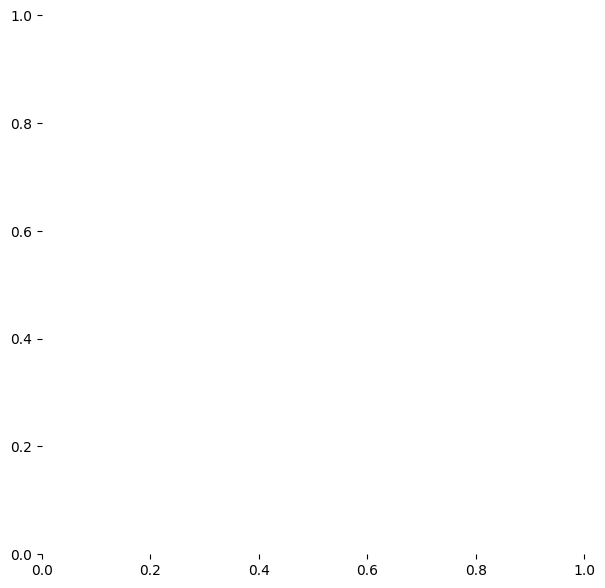

In [166]:
plot_cramer(df[["WEEKEND_TOTAL", "DAILY_TOTAL"]])

### E) Weekend score, daily score, model year

In [263]:
df_e = df[["WEEKEND_TOTAL", "DAILY_TOTAL","DOUGSCORE", "model_year"]]

In [233]:
df_e.head()

,WEEKEND_TOTAL,DAILY_TOTAL,DOUGSCORE,model_year
brand_model_year,,,,
McLaren_Speedtail_2020,48,26,74,2020
McLaren_F1_1994,47,27,74,1994
Lucid_Air Dream Edition_2022,38,35,73,2022
GMC_Hummer EV Pickup_2022,34,39,73,2022
Rivian_R1T_2021,37,36,73,2021


In [234]:
df_e['model_year'].min()

1954

In [235]:
df_e['model_year'].max()

2023

In [236]:
df_e['model_year'].value_counts()

model_year
2020    68
2019    65
2021    64
2022    46
2018    45
2017    43
2015    17
2004    16
2006    13
2016    11
1994    11
2005    10
2012    10
2008     9
1993     9
1990     9
2002     9
2014     8
1991     8
1996     8
2013     8
2001     7
2011     7
2003     7
2007     7
1992     6
1988     6
1997     6
1999     5
2009     5
2000     5
1987     5
1989     5
1985     4
2010     4
1998     3
1973     2
1971     2
1986     2
2023     2
1954     1
1981     1
1963     1
1995     1
1977     1
1972     1
1975     1
1969     1
Name: count, dtype: int64

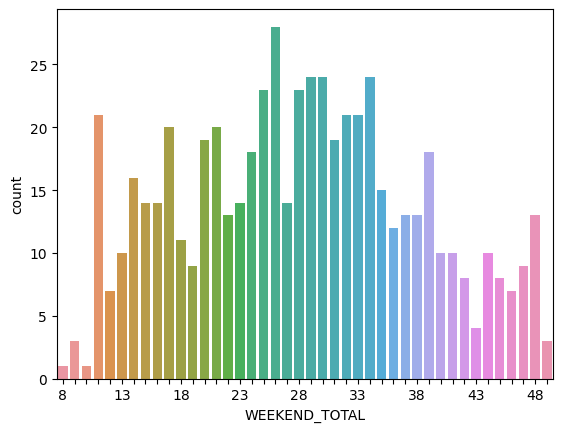

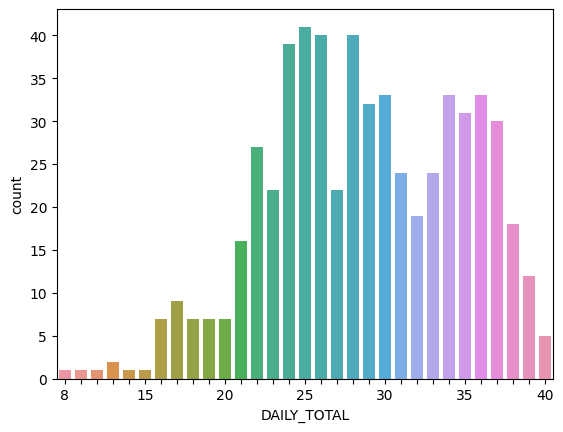

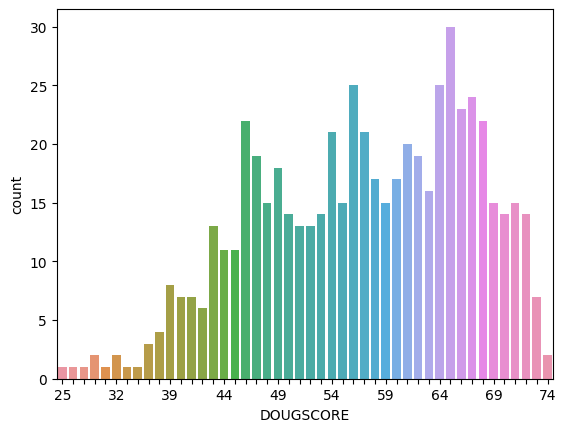

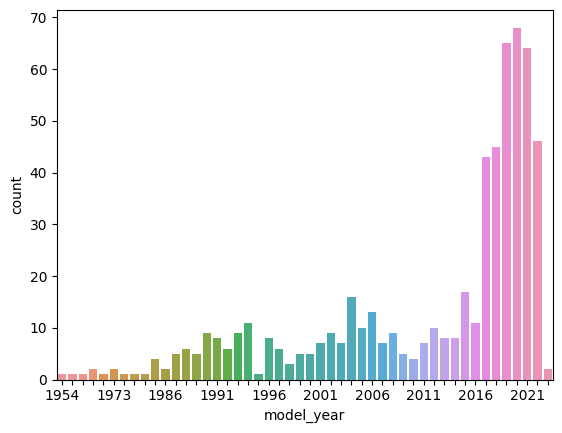

In [269]:
utils.visualise_value_counts(df_e)

In [237]:
#Let's split up the ranking by 7 decades to represent different eras of cars
"""
labels = [
                                   '1954-1963',
                                   '1964-1973',
                                   '1974-1983',
                                   '1984-1993',
                                   '1994-2003',
                                   '2004-2013',
                                   '2014-2023',
                               ]
"""
bins = [1954, 1964, 1974, 1984, 1994, 2004, 2014, 2023]
df_e['decade_rank_bin'] = pd.cut(df_e['model_year'], bins)
# df_e['decade_rank'] = pd.qcut(df['model_year'], 7, 
#                               labels=[x * 7 for x in range(7)] ) # the more modern the larger number
#df_e.drop(columns='model_year',inplace=True)

C:\Users\ChunChunMaru\AppData\Local\Temp\ipykernel_10176\3181049421.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e['decade_rank_bin'] = pd.cut(df_e['model_year'], bins)


In [238]:
df_e['decade_rank_bin']

brand_model_year
McLaren_Speedtail_2020               (2014, 2023]
McLaren_F1_1994                      (1984, 1994]
Lucid_Air Dream Edition_2022         (2014, 2023]
GMC_Hummer EV Pickup_2022            (2014, 2023]
Rivian_R1T_2021                      (2014, 2023]
                                         ...     
Nissan_Murano CrossCabriolet_2012    (2004, 2014]
Mercedes-Benz_Metris_2017            (2014, 2023]
Yugo_GV_1988                         (1984, 1994]
Trabant_Trabant_1971                 (1964, 1974]
BMW_Isetta_1969                      (1964, 1974]
Name: decade_rank_bin, Length: 585, dtype: category
Categories (7, interval[int64, right]): [(1954, 1964] < (1964, 1974] < (1974, 1984] < (1984, 1994] < (1994, 2004] < (2004, 2014] < (2014, 2023]]

In [220]:
len(df_e.index)

585

Text(0.5, 1.0, 'Number of reviewed models per decade')

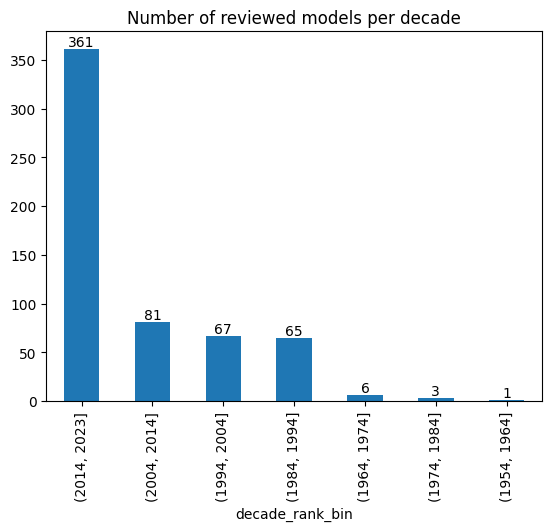

In [221]:
ax = df_e['decade_rank_bin'].value_counts().plot.bar()
ax.bar_label(ax.containers[-1], label_type='edge')
ax.set_title("Number of reviewed models per decade")

In [222]:
df_e.drop(columns='model_year',inplace=True)

C:\Users\ChunChunMaru\AppData\Local\Temp\ipykernel_10176\1054233915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e.drop(columns='model_year',inplace=True)


In [243]:
df_e_group = df_e.groupby("decade_rank_bin").mean()

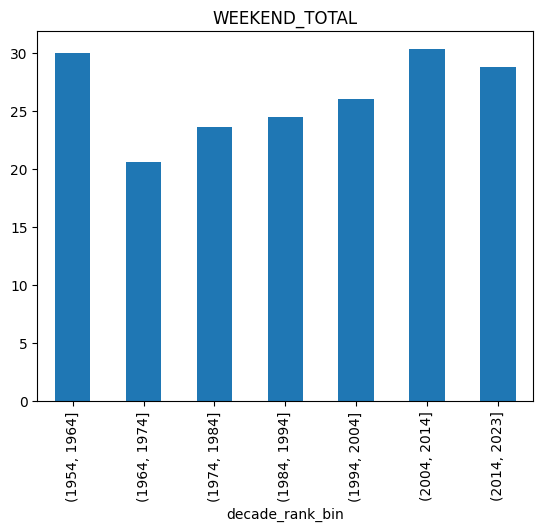

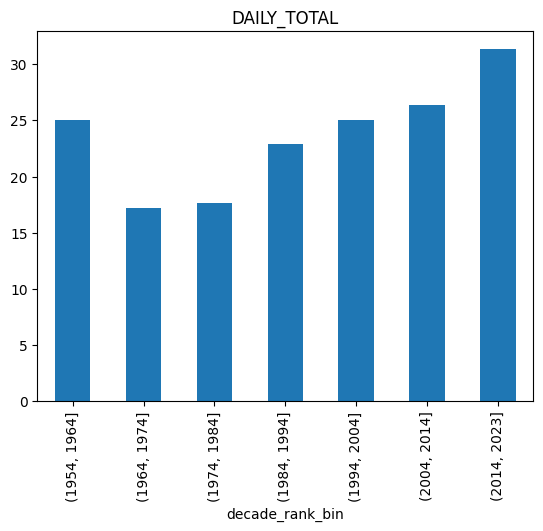

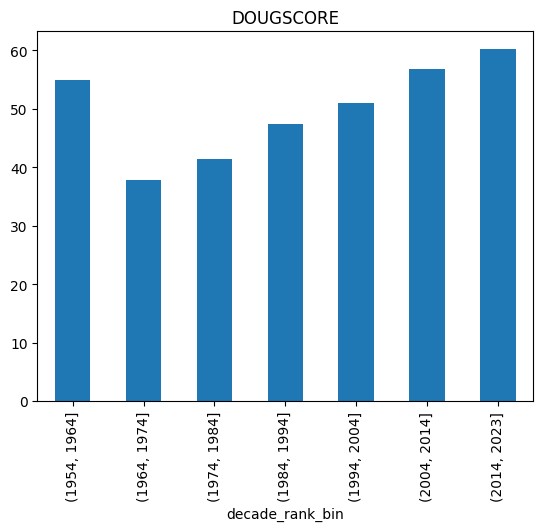

In [254]:
for score in ["WEEKEND_TOTAL", "DAILY_TOTAL","DOUGSCORE"]:
    ax = df_e_group[score].plot.bar()
    ax.set_title(score)
    plt.show()

In [242]:
# For more modern
# df_e["is_modern"] = df_e["decade_rank_bin"].apply(lambda x: x.overlaps(pd.Interval(1990, 2023, closed='left')))
for interval in df_e_group["decade_rank_bin"].unique():
    tmp_df = df_e[df_e["decade_rank_bin"] == interval]
    get_top_5_overall(tmp_df[["DOUGSCORE"]])
    get_top_5_overall(tmp_df[["WEEKEND_TOTAL"]])
    get_top_5_overall(tmp_df[["DAILY_TOTAL"]])

Top 5
brand_model_year
McLaren_Speedtail_2020          74
Lucid_Air Dream Edition_2022    73
GMC_Hummer EV Pickup_2022       73
Rivian_R1T_2021                 73
Tesla_Model S Plaid_2021        73
dtype: int64
Top 5
brand_model_year
Ferrari_Monza SP1_2020           49
Ferrari_LaFerrari_2015           49
McLaren_Elva_2020                49
McLaren_Speedtail_2020           48
Bugatti_Chiron Pur Sport_2021    48
dtype: int64
Top 5
brand_model_year
Rolls-Royce_Cullinan Black Badge_2020    40
Rolls-Royce_Cullinan_2019                40
Jeep_Grand Wagoneer_2022                 40
BMW_X7_2019                              40
Kia_Carnival SX Prestige_2022            40
dtype: int64
Top 5
brand_model_year
McLaren_F1_1994                      74
Porsche_959_1988                     65
Ferrari_F40_1990                     60
Bugatti_EB110_1993                   58
Lancia_Delta Integrale Evo 2_1993    58
dtype: int64
Top 5
brand_model_year
McLaren_F1_1994       47
Ferrari_F40_1990      47
Bugatti_

C:\Users\ChunChunMaru\AppData\Local\Temp\ipykernel_10176\2799782532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e.drop(columns='decade_rank_bin',inplace=True)


C:\Users\ChunChunMaru\AppData\Local\Temp\ipykernel_10176\3048159755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e['narrower_bin'] = pd.cut(df_e['model_year'], bins)


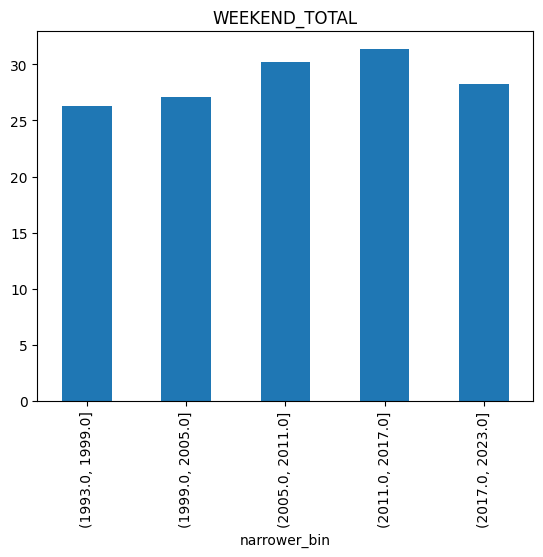

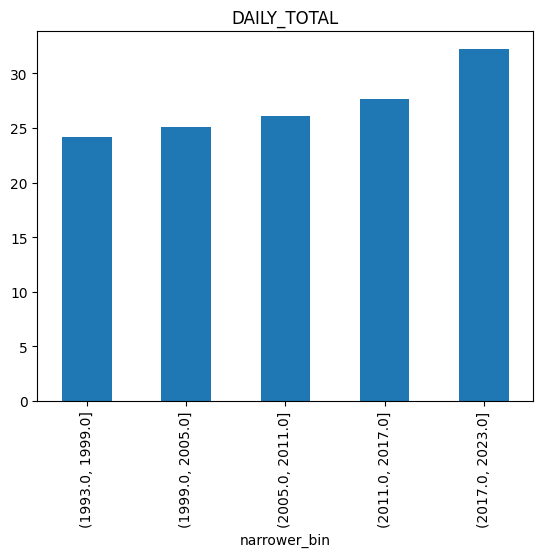

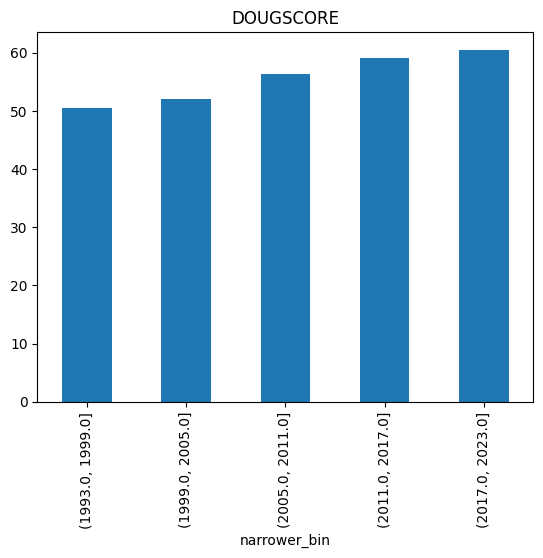

In [262]:

bins = np.linspace(1993, 2023, num=30//5) #[1954, 1964, 1974, 1984, 1994, 2004, 2014, 2023]
df_e['narrower_bin'] = pd.cut(df_e['model_year'], bins)
df_e_group = df_e.drop(columns='decade_rank_bin').groupby("narrower_bin").mean()
for score in ["WEEKEND_TOTAL", "DAILY_TOTAL","DOUGSCORE"]:
    ax = df_e_group[score].plot.bar()
    ax.set_title(score)
    plt.show()

In [149]:
# For more "classic"
# df_e['decade_rank'] = pd.qcut( -df['model_year'], 7, 
#                               labels=[x * 7 for x in range(7)] )
# get_top_5_overall(df_e)

Top 5
brand_model_year
McLaren_F1_1994                 116
Porsche_959_1988                107
Porsche_Carrera GT_2005         106
Pagani_Zonda S Roadster_2005    104
Bugatti_Veyron_2006             102
dtype: int64


C:\Users\ChunChunMaru\AppData\Local\Temp\ipykernel_10176\3896126135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e['decade_rank'] = pd.qcut( -df['model_year'], 7,


### Insights for E
- The "classic" cars with the highest scores are ground-breaking super cars for their time, engineering milestones that help to score high in some attributes such as quality 
- For modern cars, there's a more even mix between practical every day use like pickups, EVs, and performance cars. 

### Overall insights

- 

### To investigate

- Does Doug have a bias towards fancy cars, are his evaluations biased?